Body Performance

###### Data Preprocessing

Tautan menuju dataset: https://www.kaggle.com/kukuroo3/body-performance-data/version/6

Mengimport library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Mengupload dataset yang dipilih

In [2]:
data = pd.read_csv('bodyPerformance.csv')
data

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,M,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,C
13389,21.0,M,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,D
13390,39.0,M,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0,A
13391,64.0,F,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,D


Memeriksa tipe dataset

In [3]:
data.dtypes

age                        float64
gender                      object
height_cm                  float64
weight_kg                  float64
body fat_%                 float64
diastolic                  float64
systolic                   float64
gripForce                  float64
sit and bend forward_cm    float64
sit-ups counts             float64
broad jump_cm              float64
class                       object
dtype: object

Melihat kolom yang berisi angka

In [4]:
data.select_dtypes(include=['number'])

,age,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,27.0,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0
1,25.0,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0
2,31.0,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0
3,32.0,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0
4,28.0,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0
...,...,...,...,...,...,...,...,...,...,...
13388,25.0,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0
13389,21.0,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0
13390,39.0,177.2,80.50,20.1,78.0,132.0,63.5,16.4,45.0,229.0
13391,64.0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0


Melihat kolom yang berisi huruf

In [5]:
data.select_dtypes(include=['object'])

,gender,class
0,M,C
1,M,A
2,M,C
3,M,B
4,M,B
...,...,...
13388,M,C
13389,M,D
13390,M,A
13391,F,D


In [6]:
data = data.rename (columns = {'body fat_%' : 'bodyFat_Percentage', 'sit and bend forward_cm' : 'sitAndBendForward_cm',
                              'sit-ups counts' : 'sit-ups_counts', 'broad jump_cm' : 'broadJump_cm'}) 
data.head(5)

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


Merubah tipe dataset dari float menjadi int

In [7]:
data = data.astype({'age' : int, 'diastolic' : int, 'systolic' : int})
data

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
0,27,M,172.3,75.24,21.3,80,130,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70,127,43.5,27.1,45.0,217.0,B
...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25,M,172.1,71.80,16.2,74,141,35.8,17.4,47.0,198.0,C
13389,21,M,179.7,63.90,12.1,74,128,33.0,1.1,48.0,167.0,D
13390,39,M,177.2,80.50,20.1,78,132,63.5,16.4,45.0,229.0,A
13391,64,F,146.1,57.70,40.4,68,121,19.3,9.2,0.0,75.0,D


Memeriksa kembali

In [8]:
data.dtypes

age                       int32
gender                   object
height_cm               float64
weight_kg               float64
bodyFat_Percentage      float64
diastolic                 int32
systolic                  int32
gripForce               float64
sitAndBendForward_cm    float64
sit-ups_counts          float64
broadJump_cm            float64
class                    object
dtype: object

Memeriksa jumlah baris dan kolom pada dataset

In [9]:
data.shape

(13393, 12)

Memeriksa data yang mengalami duplikat

In [10]:
dataYangduplikat = data[data.duplicated()]
print ('Jumlah yang duplikat : ', dataYangduplikat.shape)

Jumlah yang duplikat :  (1, 12)


Menghilangkan data yang duplikat

In [11]:
data = data.drop_duplicates()

Memeriksa kembali dataset

In [12]:
dataYangduplikat = data[data.duplicated()]
print ('Jumlah yang duplikat : ', dataYangduplikat.shape)

Jumlah yang duplikat :  (0, 12)


Melihat ada berapa value yang unik dalam kolom 'Gender'

In [13]:
data.gender.unique()

array(['M', 'F'], dtype=object)

Melihat ada berapa banyak orang sesuai Gender yang ditentukan

In [14]:
data.gender.value_counts()

M    8467
F    4925
Name: gender, dtype: int64

Memeriksa jumlah data yang tidak ada nilainya atau disebut juga missing value

In [15]:
data.isnull().sum()

age                     0
gender                  0
height_cm               0
weight_kg               0
bodyFat_Percentage      0
diastolic               0
systolic                0
gripForce               0
sitAndBendForward_cm    0
sit-ups_counts          0
broadJump_cm            0
class                   0
dtype: int64

Memilih data yang akan digunakan

In [16]:
daten = data.head(50)
daten

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
0,27,M,172.3,75.24,21.3,80,130,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70,127,43.5,27.1,45.0,217.0,B
5,36,F,165.4,55.40,22.0,64,119,23.8,21.0,27.0,153.0,B
6,42,F,164.5,63.70,32.2,72,135,22.7,0.8,18.0,146.0,D
7,33,M,174.9,77.20,36.9,84,137,45.9,12.3,42.0,234.0,B
8,54,M,166.8,67.50,27.6,85,165,40.4,18.6,34.0,148.0,C
9,28,M,185.0,84.60,14.4,81,156,57.9,12.1,55.0,213.0,B


Mengurutkan data berdasarkan "Age" dari yang termuda ke tertua

In [17]:
datens = daten.sort_values (by = 'age' , ascending = True)
datens

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
36,21,M,172.5,66.40,12.5,82,130,51.2,6.3,46.0,178.0,D
19,21,F,162.7,47.20,18.9,78,133,25.4,20.5,36.0,137.0,B
13,22,M,175.7,67.90,11.3,71,103,52.5,19.2,55.0,232.0,C
24,23,F,164.1,59.40,29.6,91,126,24.6,27.5,32.0,169.0,C
14,24,M,181.0,84.40,20.4,80,120,48.9,7.2,54.0,213.0,C
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53.0,229.0,A
44,25,F,161.8,57.70,21.7,74,115,29.3,26.6,50.0,190.0,A
30,25,M,170.9,70.70,15.7,80,127,36.4,26.4,38.0,246.0,C
20,25,F,161.7,63.36,31.3,89,128,25.0,10.7,39.0,160.0,C
16,25,F,164.2,66.60,30.2,82,120,25.7,22.9,39.0,178.0,C


Mendeskripsi dataset pilihan

In [18]:
daten.describe(include = 'all')

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
count,50.000000,50,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
mean,35.200000,NaN,169.38200,68.493200,22.792000,77.980000,130.100000,38.386000,14.940000,43.080000,191.460000,NaN
std,11.264899,NaN,8.19693,10.712513,6.632383,10.765572,15.646934,11.099182,8.574476,13.591474,39.727238,NaN
min,21.000000,NaN,151.50000,47.200000,9.700000,59.000000,102.000000,19.900000,-9.900000,0.000000,90.000000,NaN
25%,26.000000,NaN,164.12500,61.425000,18.525000,69.250000,119.250000,26.800000,9.500000,34.500000,154.250000,NaN
50%,31.500000,NaN,169.95000,67.600000,21.850000,79.000000,129.500000,39.650000,16.100000,43.000000,206.500000,NaN
75%,42.000000,NaN,175.77500,77.200000,28.800000,84.750000,144.000000,46.275000,20.300000,54.000000,223.750000,NaN


Mengelompokkan data berdasarkan umur

In [19]:
young = datens.head(22)
young

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
36,21,M,172.5,66.40,12.5,82,130,51.2,6.3,46.0,178.0,D
19,21,F,162.7,47.20,18.9,78,133,25.4,20.5,36.0,137.0,B
13,22,M,175.7,67.90,11.3,71,103,52.5,19.2,55.0,232.0,C
24,23,F,164.1,59.40,29.6,91,126,24.6,27.5,32.0,169.0,C
14,24,M,181.0,84.40,20.4,80,120,48.9,7.2,54.0,213.0,C
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53.0,229.0,A
44,25,F,161.8,57.70,21.7,74,115,29.3,26.6,50.0,190.0,A
30,25,M,170.9,70.70,15.7,80,127,36.4,26.4,38.0,246.0,C
20,25,F,161.7,63.36,31.3,89,128,25.0,10.7,39.0,160.0,C
16,25,F,164.2,66.60,30.2,82,120,25.7,22.9,39.0,178.0,C


In [20]:
middleAge = datens.iloc[23:35]
middleAge

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49.0,181.0,C
37,31,M,177.5,79.50,23.0,90,148,51.2,18.4,62.0,208.0,A
3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53.0,219.0,B
38,32,M,178.0,84.50,21.2,68,130,52.3,16.2,62.0,232.0,A
7,33,M,174.9,77.20,36.9,84,137,45.9,12.3,42.0,234.0,B
43,33,F,159.6,60.50,32.1,62,106,21.9,22.2,24.0,129.0,C
46,34,M,183.6,76.82,16.3,80,120,46.3,14.2,55.0,220.0,B
28,36,M,176.0,81.30,24.5,81,139,46.2,8.1,54.0,232.0,C
5,36,F,165.4,55.40,22.0,64,119,23.8,21.0,27.0,153.0,B
22,38,M,166.7,67.30,23.2,70,111,26.1,19.7,62.0,215.0,D


In [21]:
old = datens.iloc[35: ]
old

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
40,42,M,168.0,61.0,14.9,94,151,28.9,1.0,32.0,230.0,D
10,42,M,169.2,65.4,19.3,63,110,43.5,16.0,68.0,211.0,A
6,42,F,164.5,63.7,32.2,72,135,22.7,0.8,18.0,146.0,D
23,44,M,170.0,63.3,12.9,65,115,44.5,11.6,49.0,196.0,B
15,45,F,159.0,63.1,30.9,93,144,34.1,19.0,30.0,155.0,A
26,47,F,158.3,53.5,29.2,70,117,25.9,8.1,32.0,151.0,D
27,48,M,175.8,84.5,31.4,83,125,33.8,3.7,24.0,211.0,D
34,49,F,151.5,52.0,27.6,77,144,23.8,21.3,39.0,154.0,B
29,50,F,159.8,57.1,24.4,63,103,30.8,24.4,30.0,143.0,A
41,52,M,173.6,84.9,30.3,93,144,42.0,9.0,43.0,185.0,D


Mendeskripsikan dataset berdasarkan kelompok umur

In [22]:
young.describe(include = 'all')

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
count,22.000000,22,22.000000,22.000000,22.00000,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000,22
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
mean,25.590909,NaN,170.631818,68.142727,20.75000,76.090909,126.272727,39.913636,14.909091,46.818182,198.727273,NaN
std,2.343361,NaN,7.861139,10.771237,6.93224,9.425947,13.345882,12.667517,9.908962,9.574949,34.921929,NaN
min,21.000000,NaN,156.000000,47.200000,9.70000,59.000000,102.000000,19.900000,-9.900000,28.000000,137.000000,NaN
25%,25.000000,NaN,164.125000,60.390000,15.70000,69.250000,120.000000,26.600000,9.500000,39.000000,171.250000,NaN
50%,26.000000,NaN,172.100000,67.800000,20.70000,79.000000,127.000000,39.250000,17.050000,48.000000,213.000000,NaN
75%,27.000000,NaN,176.450000,76.710000,24.80000,82.000000,130.000000,50.900000,22.300000,54.750000,224.500000,NaN


In [23]:
middleAge.describe(include = 'all')

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
count,12.000000,12,12.000000,12.000000,12.000000,12.000000,12.00000,12.000000,12.00000,12.000000,12.000000,12
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C
freq,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,34.583333,NaN,173.891667,74.168333,23.483333,78.000000,132.00000,40.950000,15.80000,48.500000,206.166667,NaN
std,3.146667,NaN,6.773942,9.723226,5.737727,10.608744,14.92405,10.951754,4.24778,13.090593,33.996880,NaN
min,31.000000,NaN,159.600000,55.400000,16.300000,62.000000,106.00000,21.900000,8.10000,24.000000,129.000000,NaN
25%,32.000000,NaN,171.650000,69.175000,20.250000,69.500000,119.75000,36.525000,12.25000,41.000000,201.250000,NaN
50%,33.500000,NaN,175.450000,77.010000,22.500000,78.000000,137.00000,45.350000,15.70000,53.500000,219.500000,NaN
75%,36.500000,NaN,177.700000,79.950000,23.975000,85.500000,141.00000,47.525000,18.72500,56.750000,228.250000,NaN


In [24]:
old.describe(include = 'all')

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
count,15.000000,15,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15
unique,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D
freq,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
mean,50.066667,NaN,163.906667,64.160000,25.473333,79.466667,133.200000,33.653333,14.326667,33.666667,165.200000,NaN
std,6.681175,NaN,7.374809,10.193541,6.357837,12.252502,19.038307,7.733588,9.737297,15.154757,39.277765,NaN
min,42.000000,NaN,151.500000,49.000000,12.900000,63.000000,103.000000,21.500000,0.800000,0.000000,90.000000,NaN
25%,44.500000,NaN,158.650000,59.050000,20.350000,69.500000,116.000000,27.400000,6.050000,27.500000,144.500000,NaN
50%,49.000000,NaN,164.500000,63.300000,27.600000,77.000000,143.000000,34.100000,16.000000,32.000000,154.000000,NaN
75%,55.500000,NaN,169.100000,66.450000,30.400000,93.000000,145.000000,39.850000,20.150000,41.000000,200.500000,NaN


Memvisualisasikan dataset berdasarkan kelompok umur dan Body Fat (%)

<AxesSubplot:xlabel='bodyFat_Percentage'>

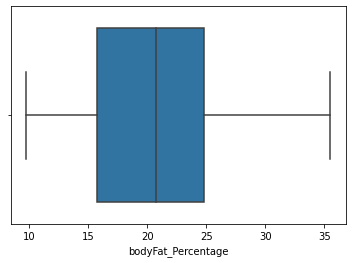

In [25]:
sns.boxplot (x = young['bodyFat_Percentage'])

<AxesSubplot:xlabel='bodyFat_Percentage'>

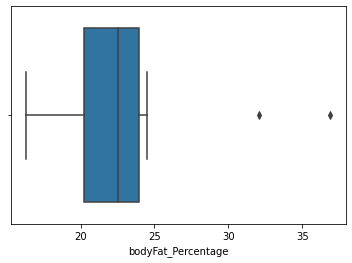

In [26]:
sns.boxplot (x = middleAge['bodyFat_Percentage'])

<AxesSubplot:xlabel='bodyFat_Percentage'>

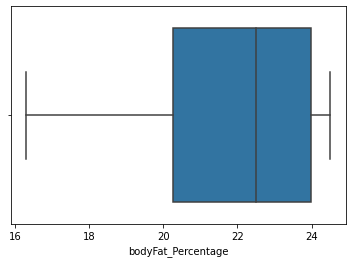

In [27]:
sns.boxplot (x = middleAge['bodyFat_Percentage'], showfliers = False)

<AxesSubplot:xlabel='bodyFat_Percentage'>

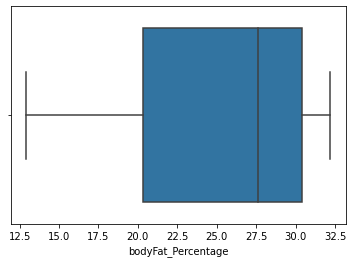

In [28]:
sns.boxplot (x = old['bodyFat_Percentage'])

Memvisualisasikan dataset berdasarkan Body Fat (%) menggunakan histogram

Text(0.5, 0, 'bodyFat_Percentage')

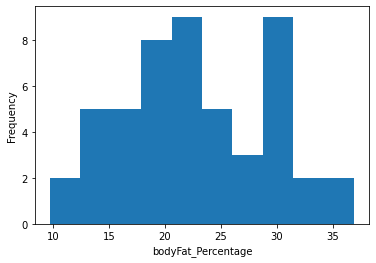

In [29]:
datens['bodyFat_Percentage'].plot.hist()
plt.xlabel('bodyFat_Percentage')

Membuat tabel pivot berdasarkan rata-rata umur terhadap Body Fat (%)

In [30]:
pd.pivot_table(datens, values = 'bodyFat_Percentage', index = ['age'], aggfunc = np.mean)

,bodyFat_Percentage
age,
21,15.700000
22,11.300000
23,29.600000
24,20.400000
25,22.920000
26,17.975000
27,26.533333
28,17.750000
30,26.700000


Membuat visualisasi tabel pivot

<AxesSubplot:xlabel='age'>

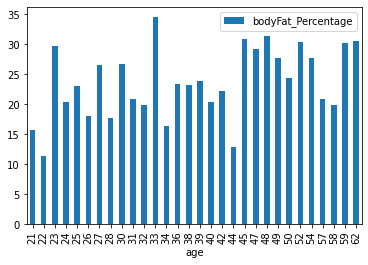

In [31]:
pd.pivot_table(datens, values = 'bodyFat_Percentage', index = ['age'], aggfunc = np.mean).plot(kind='bar')

Memisahkan data frame male dan female

In [32]:
female = daten.groupby('gender').get_group('F')
female

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
5,36,F,165.4,55.40,22.0,64,119,23.8,21.0,27.0,153.0,B
6,42,F,164.5,63.70,32.2,72,135,22.7,0.8,18.0,146.0,D
11,57,F,153.0,49.00,20.9,69,106,21.5,30.0,0.0,90.0,D
12,27,F,156.0,53.90,35.5,69,116,23.1,13.1,28.0,144.0,C
15,45,F,159.0,63.10,30.9,93,144,34.1,19.0,30.0,155.0,A
16,25,F,164.2,66.60,30.2,82,120,25.7,22.9,39.0,178.0,C
19,21,F,162.7,47.20,18.9,78,133,25.4,20.5,36.0,137.0,B
20,25,F,161.7,63.36,31.3,89,128,25.0,10.7,39.0,160.0,C
21,59,F,155.9,62.70,30.2,76,143,36.8,29.1,25.0,122.0,A
24,23,F,164.1,59.40,29.6,91,126,24.6,27.5,32.0,169.0,C


In [33]:
male = daten.groupby('gender').get_group('M')
male

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
0,27,M,172.3,75.24,21.3,80,130,54.9,18.4,60.0,217.0,C
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53.0,229.0,A
2,31,M,179.6,78.00,20.1,92,152,44.8,12.0,49.0,181.0,C
3,32,M,174.5,71.10,18.4,76,147,41.4,15.2,53.0,219.0,B
4,28,M,173.8,67.70,17.1,70,127,43.5,27.1,45.0,217.0,B
7,33,M,174.9,77.20,36.9,84,137,45.9,12.3,42.0,234.0,B
8,54,M,166.8,67.50,27.6,85,165,40.4,18.6,34.0,148.0,C
9,28,M,185.0,84.60,14.4,81,156,57.9,12.1,55.0,213.0,B
10,42,M,169.2,65.40,19.3,63,110,43.5,16.0,68.0,211.0,A
13,22,M,175.7,67.90,11.3,71,103,52.5,19.2,55.0,232.0,C


In [34]:
female[female.age == female.age.max()]

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
21,59,F,155.9,62.7,30.2,76,143,36.8,29.1,25.0,122.0,A


In [35]:
female[female.age == female.age.min()]

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
19,21,F,162.7,47.2,18.9,78,133,25.4,20.5,36.0,137.0,B


In [36]:
male[male.age == male.age.max()]

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
25,62,M,169.0,70.7,30.5,96,146,39.3,4.0,43.0,131.0,C


In [37]:
male[male.age == male.age.min()]

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm,class
36,21,M,172.5,66.4,12.5,82,130,51.2,6.3,46.0,178.0,D


In [38]:
datens.groupby('gender').bodyFat_Percentage.describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
F,16.0,27.575000,4.865319,18.9,23.80,29.4,31.00,35.5
M,34.0,20.541176,6.184248,9.7,15.85,20.2,23.65,36.9


In [39]:
deiteo = daten[['gender', 'bodyFat_Percentage']]
deiteo

,gender,bodyFat_Percentage
0,M,21.3
1,M,15.7
2,M,20.1
3,M,18.4
4,M,17.1
5,F,22.0
6,F,32.2
7,M,36.9
8,M,27.6
9,M,14.4


array([<AxesSubplot:title={'center':'F'}>,
       <AxesSubplot:title={'center':'M'}>], dtype=object)

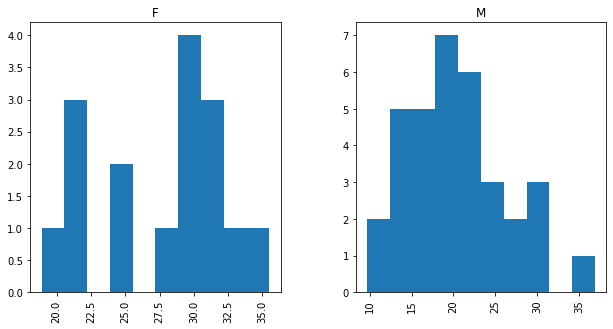

In [40]:
#menggunakan library PANDAS
deiteo['bodyFat_Percentage'].hist(by=deiteo['gender'], layout=(1,2), figsize=(10,5))

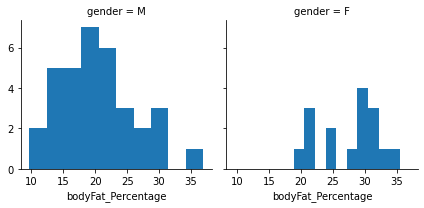

In [41]:
#menggunakan library seaborn
x = sns.FacetGrid(deiteo, col='gender')
x.map(plt.hist, 'bodyFat_Percentage')

In [42]:
#pandas

<AxesSubplot:title={'center':'bodyFat_Percentage'}, xlabel='gender'>

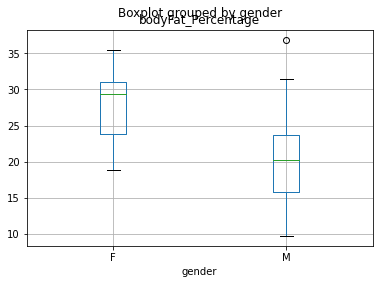

In [43]:
deiteo.boxplot(column='bodyFat_Percentage', by='gender')

In [44]:
#seaborn

<AxesSubplot:xlabel='bodyFat_Percentage', ylabel='gender'>

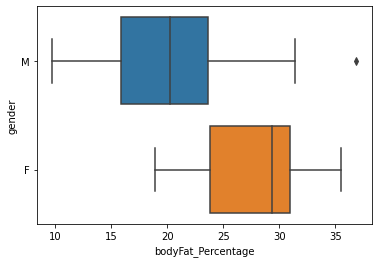

In [45]:
sns.boxplot(x = 'bodyFat_Percentage', y = 'gender', data = deiteo) 

<AxesSubplot:xlabel='bodyFat_Percentage', ylabel='gender'>

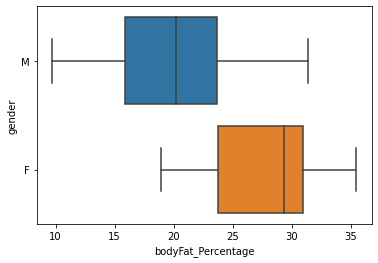

In [46]:
sns.boxplot(x = 'bodyFat_Percentage', y = 'gender', data = deiteo, showfliers = False) 

<AxesSubplot:xlabel='bodyFat_Percentage', ylabel='gender'>

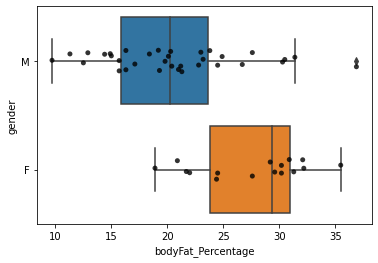

In [47]:
sns.boxplot(x = 'bodyFat_Percentage', y = 'gender', data = deiteo) 
sns.stripplot(x = 'bodyFat_Percentage', y = 'gender', data = deiteo,
              jitter=True, #persebaran
              marker='o',
              alpha=0.8, #ketebalan titiknya
              color="black")

<AxesSubplot:xlabel='bodyFat_Percentage', ylabel='gender'>

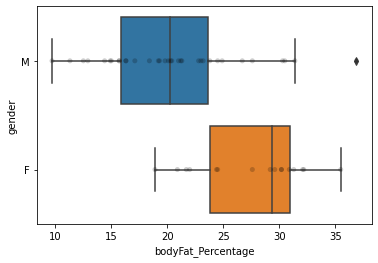

In [48]:
sns.boxplot(x = 'bodyFat_Percentage', y = 'gender', data = deiteo) 
sns.stripplot(x = 'bodyFat_Percentage', y = 'gender', data = deiteo,
              jitter=False, #persebaran
              marker='o',
              alpha=0.2, #ketebalan titiknya
              color="black")

In [49]:
corr = datens.corr()
corr

,age,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm
age,1.000000,-0.361897,-0.120741,0.338705,0.163604,0.228789,-0.215499,0.034228,-0.430113,-0.415283
height_cm,-0.361897,1.000000,0.857312,-0.476193,0.106032,0.225057,0.785187,-0.385755,0.672241,0.734514
weight_kg,-0.120741,0.857312,1.000000,-0.133007,0.272135,0.342437,0.712536,-0.395933,0.542596,0.637685
bodyFat_Percentage,0.338705,-0.476193,-0.133007,1.000000,0.160630,0.009762,-0.546440,-0.082407,-0.493127,-0.527527
diastolic,0.163604,0.106032,0.272135,0.160630,1.000000,0.701372,0.116446,-0.100209,-0.075306,0.086104
systolic,0.228789,0.225057,0.342437,0.009762,0.701372,1.000000,0.321475,-0.103498,0.052262,0.171828
gripForce,-0.215499,0.785187,0.712536,-0.546440,0.116446,0.321475,1.000000,-0.080613,0.700954,0.664657
sitAndBendForward_cm,0.034228,-0.385755,-0.395933,-0.082407,-0.100209,-0.103498,-0.080613,1.000000,-0.151435,-0.153524
sit-ups_counts,-0.430113,0.672241,0.542596,-0.493127,-0.075306,0.052262,0.700954,-0.151435,1.000000,0.697498
broadJump_cm,-0.415283,0.734514,0.637685,-0.527527,0.086104,0.171828,0.664657,-0.153524,0.697498,1.000000


In [50]:
selections = ['age','gender','height_cm','weight_kg','bodyFat_Percentage','diastolic','systolic','gripForce','sitAndBendForward_cm','sit-ups_counts','broadJump_cm']
groupings = datens[selections]
groupings

,age,gender,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm
36,21,M,172.5,66.40,12.5,82,130,51.2,6.3,46.0,178.0
19,21,F,162.7,47.20,18.9,78,133,25.4,20.5,36.0,137.0
13,22,M,175.7,67.90,11.3,71,103,52.5,19.2,55.0,232.0
24,23,F,164.1,59.40,29.6,91,126,24.6,27.5,32.0,169.0
14,24,M,181.0,84.40,20.4,80,120,48.9,7.2,54.0,213.0
1,25,M,165.0,55.80,15.7,77,126,36.4,16.3,53.0,229.0
44,25,F,161.8,57.70,21.7,74,115,29.3,26.6,50.0,190.0
30,25,M,170.9,70.70,15.7,80,127,36.4,26.4,38.0,246.0
20,25,F,161.7,63.36,31.3,89,128,25.0,10.7,39.0,160.0
16,25,F,164.2,66.60,30.2,82,120,25.7,22.9,39.0,178.0


<AxesSubplot:>

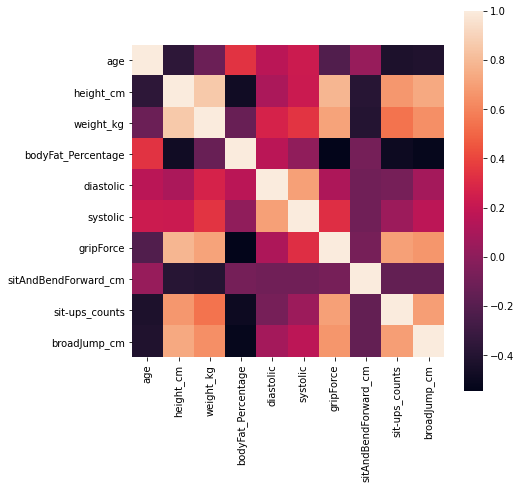

In [51]:
fig, ax = plt.subplots(figsize=(7,7))
sns.heatmap(corr, square=True)

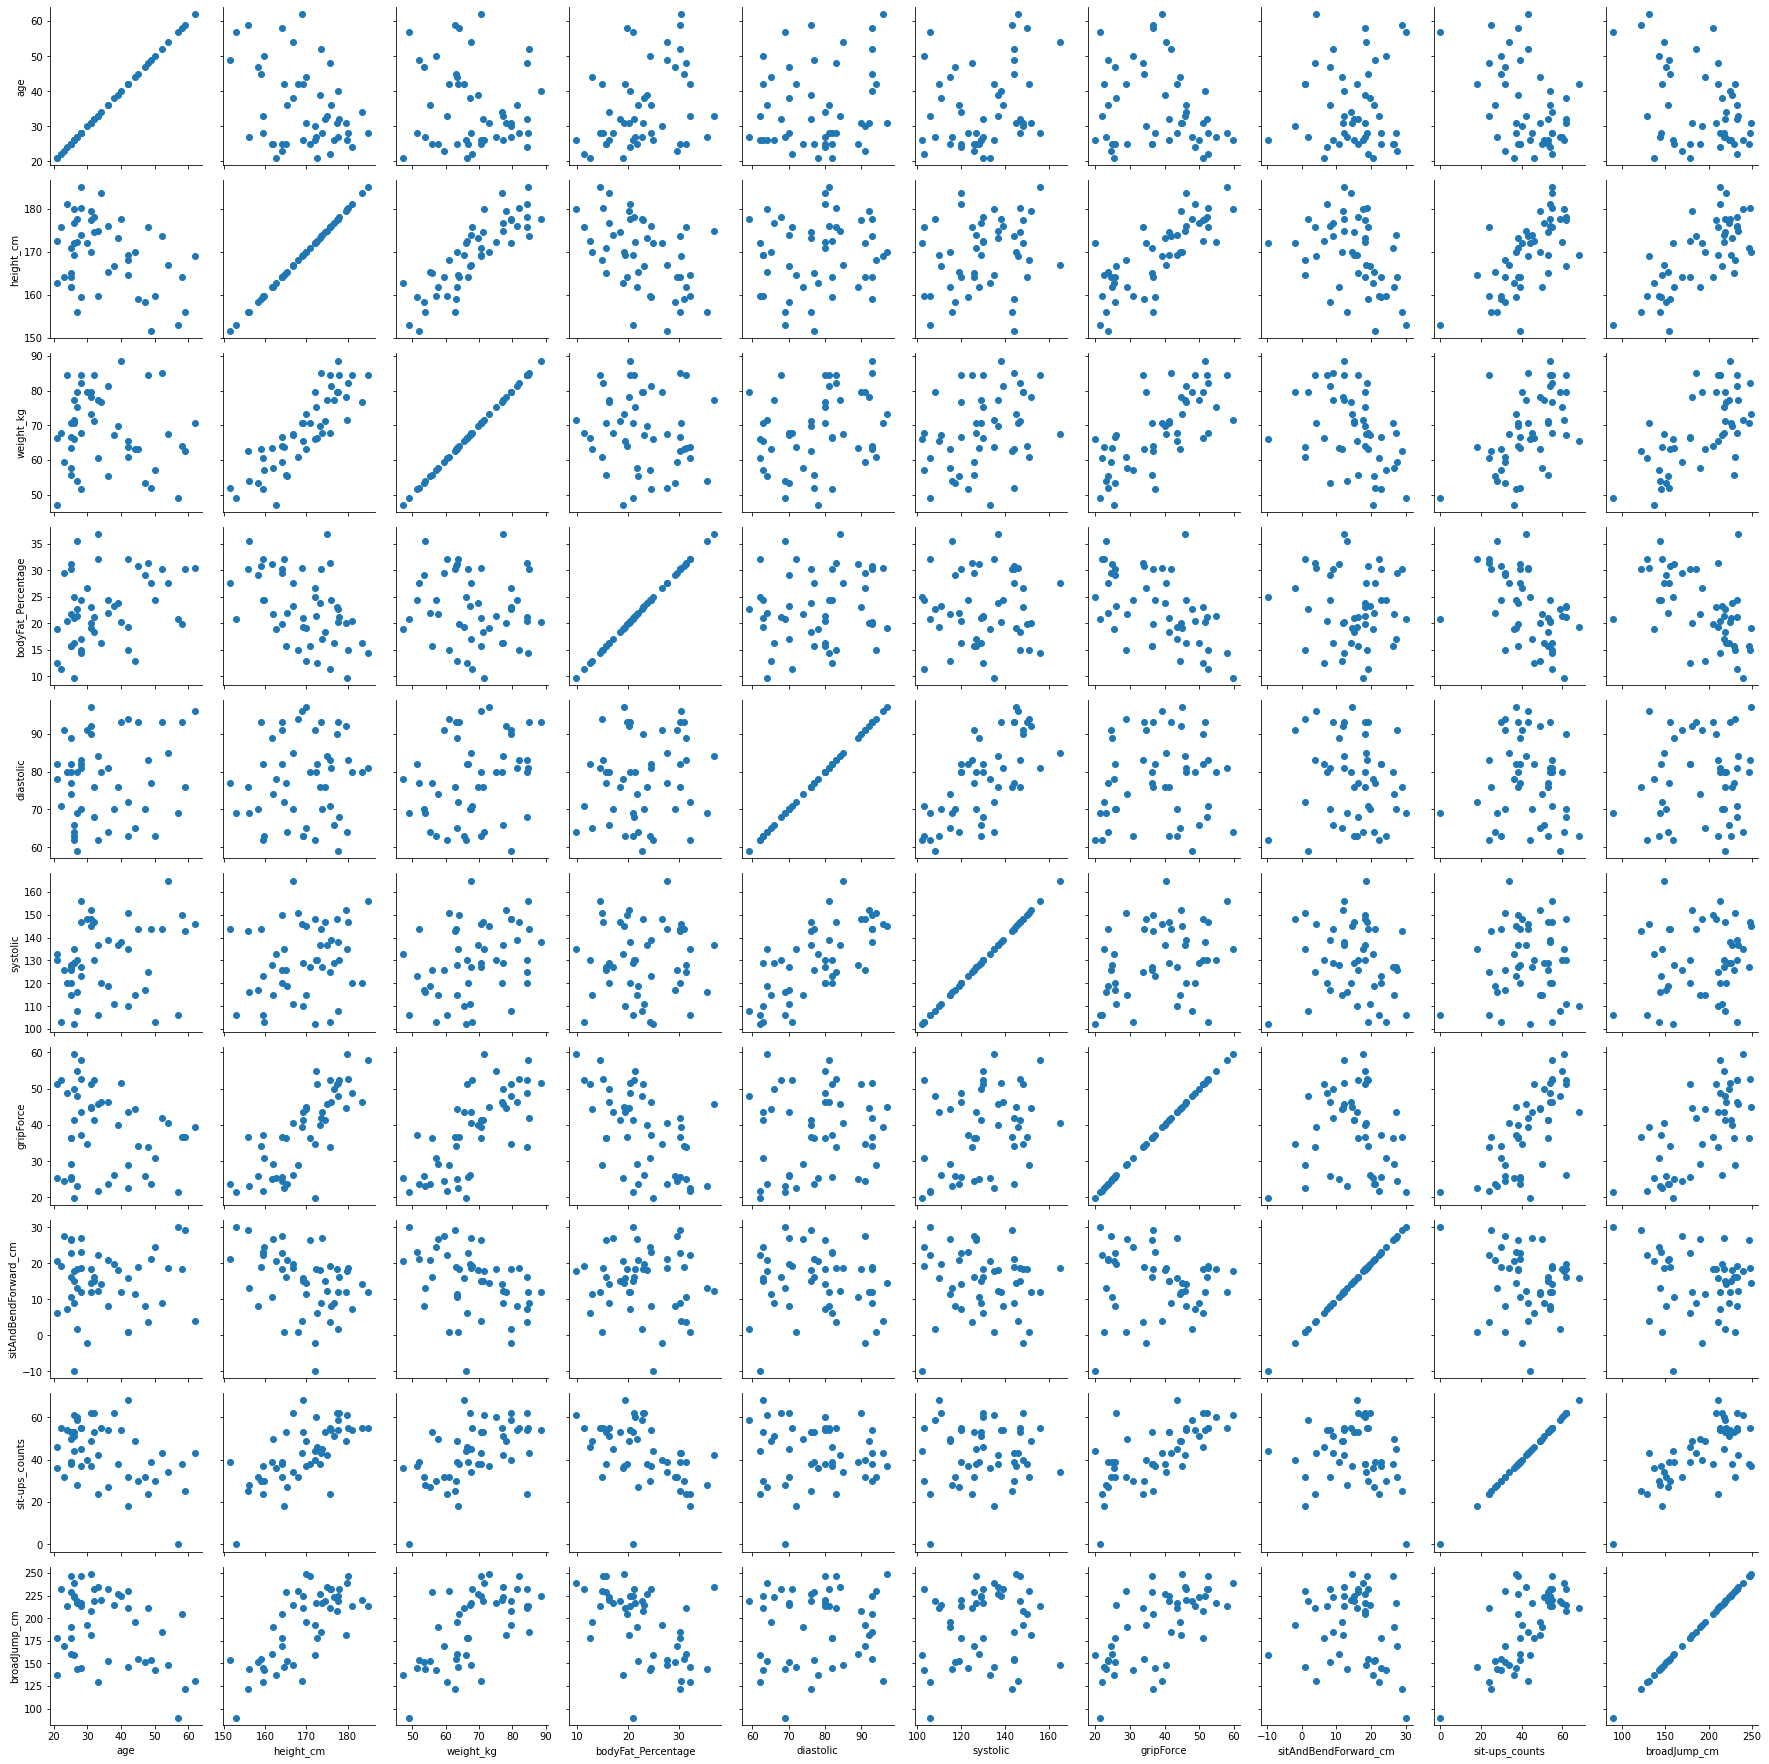

In [52]:
groupings2 = sns.PairGrid(groupings)
groupings2.map(plt.scatter);

In [53]:
corr = groupings.corr()
corr

,age,height_cm,weight_kg,bodyFat_Percentage,diastolic,systolic,gripForce,sitAndBendForward_cm,sit-ups_counts,broadJump_cm
age,1.000000,-0.361897,-0.120741,0.338705,0.163604,0.228789,-0.215499,0.034228,-0.430113,-0.415283
height_cm,-0.361897,1.000000,0.857312,-0.476193,0.106032,0.225057,0.785187,-0.385755,0.672241,0.734514
weight_kg,-0.120741,0.857312,1.000000,-0.133007,0.272135,0.342437,0.712536,-0.395933,0.542596,0.637685
bodyFat_Percentage,0.338705,-0.476193,-0.133007,1.000000,0.160630,0.009762,-0.546440,-0.082407,-0.493127,-0.527527
diastolic,0.163604,0.106032,0.272135,0.160630,1.000000,0.701372,0.116446,-0.100209,-0.075306,0.086104
systolic,0.228789,0.225057,0.342437,0.009762,0.701372,1.000000,0.321475,-0.103498,0.052262,0.171828
gripForce,-0.215499,0.785187,0.712536,-0.546440,0.116446,0.321475,1.000000,-0.080613,0.700954,0.664657
sitAndBendForward_cm,0.034228,-0.385755,-0.395933,-0.082407,-0.100209,-0.103498,-0.080613,1.000000,-0.151435,-0.153524
sit-ups_counts,-0.430113,0.672241,0.542596,-0.493127,-0.075306,0.052262,0.700954,-0.151435,1.000000,0.697498
broadJump_cm,-0.415283,0.734514,0.637685,-0.527527,0.086104,0.171828,0.664657,-0.153524,0.697498,1.000000
